### 들어가는 말
본 자료는 다음과 같은 책들을 참고로 하였습니다.

* 우석진, "경제 빅데이터 분석을 위한 R," (주)지필미디어. 
* 강병서 조철호, "의사결정을 위한 현대통계학," 무역경영사.

광운대학교 경영학부 부교수 김태경

2020년 4월 29일

# 중심 위치
회귀 분석을 살펴보기 앞서 통계의 기본적인 개념들을 짚어보자.

## 산술 평균
통계 데이터는 여러 설명되지 않은 오류(혹은 확률적 상황)가 포함된다. 그렇기에 각각의 관측값이 다르고 이들 관측값의 다름을 보여주는 소위 '분포'라는 것도 생긴다. 그렇지만 이렇게 서로 다른 관측값을 모두 모아 어떤 하나의 값으로 대표되는 그런 것을 만들 수 없을까? 즉, 집단을 대표하는 값 하나는 없는가? 중심이란 그런 대표값을 뜻한다.

산술 평균은 중심 위치의 대표 주자다. 간단히 평균(mean, average)라고 한다. 확률적 특성을 보다 강조해서 기대값(expected value: EV)이라고도 한다. 쓰임이 많은 만큼 이름도 다양하다.

### 모집단 평균
우리고 모든 값이 포함된 모집단(모든 것의 집단, 뭐 이렇게 생각하자)을 알고 있고, 그 크기가 N개로 유한하다면, 다음과 같이 산술 평균을 계산할 수 있다.

$$ \mu=\frac{1}{N}\left( X_1+X_2+X_3+\cdots+X_{N-1}+X_N \right) $$

줄여서 쓰면

$$ \mu=\frac{1}{N}\sum_{i=1}^{N}X_{i} $$

## 가중평균
산술 평균은 중심점을 구할 때 모든 관측치를 동일하게 본다. 만약 관측치에 대해서 다른 평가를 내려야 하면 어떻게 할까? 가령 3번의 시험을 보았을 때 1차 2차의 비중을 20%로 3차의 비중을 60%로 둔다면? 이렇게 가중치가 있는 경우에는 가중합을 이용한 평균계산을 해야 한다. 

모든 가중치의 합이 1이 되면 가중치는 확률의 개념과 같아진다. 그렇다면 각각의 값들에 확률값을 곱해서 합한 것과 평균이 같아지고, 각각의 값을 해당 경우의 확률적인 기대 승산(expected value)이 된다. 따라서 기대값을 평균과 같은 개념으로 볼 수 있다.

$$ \overline{X}_{w}=\frac{\sum_{i=1}^{n}w_{i}X_{i}}{\sum_{i=1}^{n}w_{i}} $$

In [2]:
#6명의 평균을 구해보자.
score=c(85,95,78,76,60,74)
my_mean=function(my_data) {
    n=length(score) #관측값의 개수
    s=sum(score) #sigma
    return(s/n)
}
my_mean(score)

[1] 78

R에서 산술 평균 함수를 정의했다. 함수의 정의는 `함수이름=function(파라미터,...)`로 간단하게 할 수 있고, 함수의 코드는 {와 }로 묶는다. 계산한 다음에 반환하는 값을 return()안에 넣었다. 하지만 더 간단히 R이 제공하는 mean()함수를 사용할 수 있다.

In [3]:
mean(score)

[1] 78

R의 할당(<-) 기호 대신에 C코드의 할당 기호인 =를 사용할 수 있다. 따라서
```{r}
score=c(85,95,78,76,60,74)
score<-c(85,95,78,76,60,74)
```
둘은 같다.

### 문제
다음은 통계학을 수강하는  A, B, C 반의 수강생 수와 평균 점수이다. 전체 평균은 얼마인가?

|반|수강생(명)|반평균(점수)|
|---|---|---|
|A|40|75|
|B|50|73|
|C|20|80|



In [4]:
my_data <- data.frame(
    class=c('A','B','C'),
    students=c(40,50,20),
    mean_score=c(75,73,80)
)
str(my_data)

'data.frame':	3 obs. of  3 variables:
 $ class     : Factor w/ 3 levels "A","B","C": 1 2 3
 $ students  : num  40 50 20
 $ mean_score: num  75 73 80


In [6]:
my_data

class,students,mean_score
A,40,75
B,50,73
C,20,80


반 평균을 이미 알고 있어서 평균을 기준으로 각 반의 기대 승산을 구하여 합하면 된다. 따라서 students의 수를 가중치로 하는 벡터를 하나 계산하고 mean_score와 곱해서 합하는 가중 평균 계산을 수행하자.

In [7]:
점수확률 <- my_data$students/sum(my_data$students)
점수확률

[1] 0.3636364 0.4545455 0.1818182

In [8]:
sum(점수확률)

[1] 1

In [11]:
전체평균기대값=sum(점수확률 * my_data$mean_score)

In [12]:
cat("전체 평균은",전체평균기대값,"이다.","\n")

전체 평균은 75 이다. 


## 산포
산포는 자료가 흩어져 있는 정도를 말한다. 이를 측정하기 위해 분산(variance)와 분산의 루트 값인 표준편차(standard deviation)이 사용된다.

예를 통해 분산의 의미를 알아보자.

In [31]:
score1=rnorm(200,mean=50,sd=1)
score2=rnorm(200,mean=50,sd=2)
score3=rnorm(300,mean=50,sd=3)

예를 위해 3개 반 점수를 정규분포 함수로 만들었다. 평균은 50, 표준편차는 각각 1,2,3이다. 정규분포의 값을 생성하는 함수는 `rnorm(변수 개수, 평균, 표준편차)`이다. 

In [15]:
suppressMessages(suppressWarnings({
    library(ggplot2)
    library(tidyverse)
}))


예를 위해서 ggplot2와 tidyverse 패키지를 불러 사용하자. 설치가 되지 않았다면 설치한다.

In [16]:
my_score=bind_rows(
    tibble(class='A',score=score1),
    tibble(class='B',score=score2),
    tibble(class='C',score=score3)
)

각 클래스를 합쳐서 전체 점수가 포함된 데이터를 생성한다. 점수 객체를 tibble()로 하는 세 개의 데이터 객체를 만들고 (각각 A, B, C반의 점수), 이를 `bind_rows()`함수로 합쳤다.

구조를 str()함수로 살펴보고, 몇 개의 변수 값을 head()로 확인하자.

In [17]:
str(my_score)

Classes 'tbl_df', 'tbl' and 'data.frame':	700 obs. of  2 variables:
 $ class: chr  "A" "A" "A" "A" ...
 $ score: num  50.6 49.4 51.1 50.2 50.7 ...


In [19]:
head(my_score,5)

class,score
A,50.59233
A,49.37197
A,51.14963
A,50.15445
A,50.73286


tidyverse로 데이터를 요약한 다음 평균과 표준편차를 각 반에 대해서 구해보자. 내용을 잘 이해하지 못해도 괜찮다. 수업 중에 열심히 배우게 될 것이다.

In [22]:
my_score %>% group_by(class) %>% summarise(mean_score=round(mean(score))) %>% ungroup()

class,mean_score
A,50
B,50
C,50


In [23]:
my_score %>% group_by(class) %>% summarise(standard_deviation=round(sd(score))) %>% ungroup()

class,standard_deviation
A,1
B,2
C,3


결과를 보면 각각의 평균은 모두 50이고, 표준편차는 1,2,3으로 차이가 난다. 표준편차의 차이가 무슨 뜻인지를 이해하자는 것이 핵심이다.

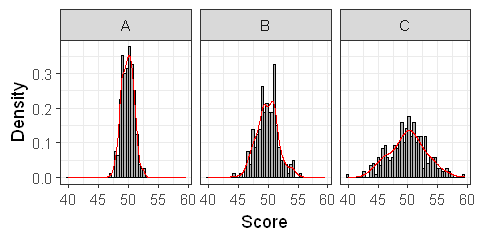

In [45]:
options(repr.plot.width=4,repr.plot.height=2)
g <- ggplot(my_score,aes(x=score))
g <- g+geom_histogram(aes(y=..density..),alpha=0.3,color='black',bins=50,fill='black')+geom_density(alpha=0.2,color='red')
g <- g+facet_grid(.~class)
g <- g+theme_bw()+labs(x='Score',y='Density')
print(g)

결과를 보면 A가 가장 표준편차가 작아서 평균 50을 근처로 가장 density가 높다. 한편 C는 표준편차가 3이나 되어서 자료가 평균 근처에 있지 않고 퍼져 있다.

## 표준편차의 의미
표준편차가 달라도 평균은 같을 수 있다. 그러나 표준편차가 작은 평균이 더 효율적인 평균이다. 극단적으로 표준편차가 작다면 어떤 관측값을 선택해도 평균에 가까운 것이라서 진정한 평균에 위치한 (즉 전체 자료를 대표하는) 관측치를 찾기 위한 수고를 덜 수 있다. 예를 들어 표준편차가 0.00000001이라면 한 반에 누구를 붙잡고 점수를 따져봐도 평균점수에 가까울 것이다. 

예를 보자.

In [46]:
score_high_sd=c(0,10,20,30,40,50,60,70,80,90,100)
mean(score_high_sd)

[1] 50

In [47]:
score_low_sd=c(49.9,50,50,50,50,50,50,50,50,50.1)
mean(score_low_sd)

[1] 50

In [48]:
sd(score_high_sd)

[1] 33.16625

In [49]:
sd(score_low_sd)

[1] 0.04714045

score_high_sd집단은 평균에 거의 가까운 관측치가 1개에 불과하지만 score_low_sd는 거의 모든 값이 평균에 가깝다. 따라서 score_low_sd 집단에서는 뭐를 골라도 자료를 대표한다고 말할 수 있다.

### 표준편차 계산하기
앞에서 보면 R의 sd() 함수로 표준편차를 계산한다. 이제 손으로 계산해보자.

관측값과 평균의 차이, 즉 $x_{i}-\mu$를 계산하는 일에서 출발하자.

이를  $T_{i}$라고 하고, 각각의 관측값 i에 대해서 $T^2$에 대한 평균을 구하면 분산($V$)을 구할 수 있다.

$$V=\frac{1}{N}\sum T^2$$
$$V=\frac{1}{N}\sum_{i=1}^{N}(x_i-\mu)^2$$



표준편차는 분산의 제곱근이다. 

$$\rho=\sqrt{V}$$

표본의 표준편차를 계산할 때는 N 대신에 n-1을 사용한다.

$$ \rho=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\mu)^2} $$

In [51]:
score <- tibble(
    student_id=c(1,2,3,4,5),
    score=c(90,85,72,78,75)
)

In [52]:
score

student_id,score
1,90
2,85
3,72
4,78
5,75


In [53]:
mean(score$score)

[1] 80

In [54]:
score %>% mutate(dev=score-mean(score))

student_id,score,dev
1,90,10
2,85,5
3,72,-8
4,78,-2
5,75,-5


In [56]:
score <- score %>% mutate(dev=score-mean(score)) %>% mutate(dev2=(score-mean(score))^2)
score

student_id,score,dev,dev2
1,90,10,100
2,85,5,25
3,72,-8,64
4,78,-2,4
5,75,-5,25


In [63]:
sqrt(sum(score$dev2)/(nrow(score)-1))

[1] 7.382412

In [62]:
sd(score$score)

[1] 7.382412

In [64]:
#분산은
var(score$score)

[1] 54.5

In [65]:
var(score$score)==sd(score$score)^2

[1] TRUE

# 회귀분석
## 분석 목적
* 정책변수와 성과변수 사이의 인과관계 추정



## 예제
* 노동경제학에서 자주 사용하는 Mincer의 임금 방정식을 보자.
* 로그 임금은 교육과 경력에 의해 결정된다고 생각할 때 다음과 같은 방정식을 세울 수 있다.
$$ ln(w_{i})=\beta_{0}+\beta_{1}edu_{i}+\beta_{2}exp_{i}+\epsilon_{i}$$
* 물론 교육은 edu, 경력은 exp, 그리고 첨자 i는 각 개인(individual)을 나타낸다. 엡실론은 미처 설명하지 못한 개인의 차이를 뜻한다.

In [1]:
suppressMessages(suppressWarnings({
    library(AER) #계량경제 패키지
    library(tidyverse) #데이터처리 패키지
    library(ggplot2) #그래프 도구
    library(grid) #그래프 도구
    library(gridExtra) #그래프 도구
}))

함수 suppressMessage()는 메시지를 보여주지 말라는 뜻, 그리고 suppressWarnings()는 경고를 보여주지 말라는 뜻이다.

In [2]:
data(PSID1976)

데이터를 불러오는 data()함수를 사용하여 AER 패키지 안에 있는 PSID1976 데이터를 가져왔다. 이 데이터를 이용해서 회귀분석을 수행해보자.

In [3]:
str(PSID1976)

'data.frame':	753 obs. of  21 variables:
 $ participation: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ hours        : int  1610 1656 1980 456 1568 2032 1440 1020 1458 1600 ...
 $ youngkids    : int  1 0 1 0 1 0 0 0 0 0 ...
 $ oldkids      : int  0 2 3 3 2 0 2 0 2 2 ...
 $ age          : int  32 30 35 34 31 54 37 54 48 39 ...
 $ education    : int  12 12 12 12 14 12 16 12 12 12 ...
 $ wage         : num  3.35 1.39 4.55 1.1 4.59 ...
 $ repwage      : num  2.65 2.65 4.04 3.25 3.6 4.7 5.95 9.98 0 4.15 ...
 $ hhours       : int  2708 2310 3072 1920 2000 1040 2670 4120 1995 2100 ...
 $ hage         : int  34 30 40 53 32 57 37 53 52 43 ...
 $ heducation   : int  12 9 12 10 12 11 12 8 4 12 ...
 $ hwage        : num  4.03 8.44 3.58 3.54 10 ...
 $ fincome      : int  16310 21800 21040 7300 27300 19495 21152 18900 20405 20425 ...
 $ tax          : num  0.722 0.661 0.692 0.781 0.622 ...
 $ meducation   : int  12 7 12 7 12 14 14 3 7 7 ...
 $ feducation   : int  7 7 7 7 14 7 7 3 7 7 ..

데이터의 구조를 보기 위해 str() 함수를 사용했다. 데이터의 클래스는 data.frame이고 753개의 관측치(obs), 21개의 변수(variables)이 있는 것을 확인할 수 있다. 그리고 변수는 각각 participation, hours, youngkids 등이다. 변수를 나타내는 첨자는 $이다. 예를 들어 $participation이라고 하면 "변수 participation"이다. 각 변수의 데이터 특성이 Factor(요인), int(정수), num(실수) 등으로 표시되었다. 그리고 해당 데이터를 조금 보여준다. Factor w/ 2는 요인 2개라는 뜻이고 각각의 요인 수준(levels)은 "no", "yes" 등으로 표시된다. 뒤의 점수는 요인 수준에 따라 할당된 숫자다. 예를 들어 no=1, yes=2 라는 식이라서 2 2 2 라면 yes yes yes가 된다.

In [4]:
attach(PSID1976)

함수 attach()는 해당 데이터의 변수들을 전부 벡터형태로 풀어서 현재의 작업 환경(global environment)에 풀어놓는다. 이를 거둬들이려면 detatch()라고 하면 된다.

In [5]:
ls()

[1] "PSID1976"

현재 작업 환경(environment)의 메모리 객체를 보려면 함수 ls()를 실행한다.

In [6]:
head(PSID1976)

participation,hours,youngkids,oldkids,age,education,wage,repwage,hhours,hage,...,hwage,fincome,tax,meducation,feducation,unemp,city,experience,college,hcollege
yes,1610,1,0,32,12,3.3540,2.65,2708,34,...,4.0288,16310,0.7215,12,7,5.0,no,14,no,no
yes,1656,0,2,30,12,1.3889,2.65,2310,30,...,8.4416,21800,0.6615,7,7,11.0,yes,5,no,no
yes,1980,1,3,35,12,4.5455,4.04,3072,40,...,3.5807,21040,0.6915,12,7,5.0,no,15,no,no
yes,456,0,3,34,12,1.0965,3.25,1920,53,...,3.5417,7300,0.7815,7,7,5.0,no,6,no,no
yes,1568,1,2,31,14,4.5918,3.60,2000,32,...,10.0000,27300,0.6215,12,14,9.5,yes,7,yes,no
yes,2032,0,0,54,12,4.7421,4.70,1040,57,...,6.7106,19495,0.6915,14,7,7.5,yes,33,no,no


In [7]:
tail(hours)

[1] 0 0 0 0 0 0

데이터의 일부를 살펴보기 위해 head()와 tail()을 실행했다. 각각 처음 5개, 뒤의 5개라는 말이다. 보여주는 개수를 정해줄 수도 있다.

In [8]:
head(PSID1976, n=2)

participation,hours,youngkids,oldkids,age,education,wage,repwage,hhours,hage,...,hwage,fincome,tax,meducation,feducation,unemp,city,experience,college,hcollege
yes,1610,1,0,32,12,3.3540,2.65,2708,34,...,4.0288,16310,0.7215,12,7,5,no,14,no,no
yes,1656,0,2,30,12,1.3889,2.65,2310,30,...,8.4416,21800,0.6615,7,7,11,yes,5,no,no


### 데이터 변환 - log 임금
PSID1976의 임금 데이터는 명목임금으로 log값으로 변환되지 않았다. 우리가 추정하려는 식의 임금은 log(임금)이기 때문에 이를 변환해서 사용해야 한다. tidyverse의 mutate()함수를 써서 logwage 변수를 추가하자.

In [9]:
PSID1976<-PSID1976%>%mutate(logwage=log(wage))

In [10]:
names(PSID1976)

[1] "participation" "hours"         "youngkids"     "oldkids"      
 [5] "age"           "education"     "wage"          "repwage"      
 [9] "hhours"        "hage"          "heducation"    "hwage"        
[13] "fincome"       "tax"           "meducation"    "feducation"   
[17] "unemp"         "city"          "experience"    "college"      
[21] "hcollege"      "logwage"

변수의 이름을 출력하는 함수 names()를 써서 확인해보니 logwage가 새로 생성되었다. 

### 무한대 처리
임금이 없으면 0인데, log(0)을 취하면 -무한대가 된다(-Inf). 이 경우에는 계산이 불가능하기 때문에 계산에서 이 부분을 제외시켜야 한다. 가장 간단한 방법은 해당 부분을 결측치(NA)로 바꾸면 된다.

In [11]:
tail(PSID1976$logwage)

[1] -Inf -Inf -Inf -Inf -Inf -Inf

잠깐, 결측치를 확인하는 함수는 is.na()이고 여기에 결측치면 TRUE, 그렇지 않으면 FALSE를 할당한다.

In [12]:
is.na(c(NA,1,2,NA,3,4))

[1]  TRUE FALSE FALSE  TRUE FALSE FALSE

벡터를 결측치로 처리하면 TRUE나 FALSE로 값을 할당하면 된다.

In [13]:
test<-c(NA,1,2,NA,3,4)
test
is.na(test)<-TRUE
test
rm(test)

[1] NA  1  2 NA  3  4

[1] NA NA NA NA NA NA

벡터 test는 잠시 썼던 것이라서 메모리에서 깔끔하게 지웠다. 이때 rm() 함수를 썼다. Remove라는 뜻이다.

무한대를 확인하는 함수는 is.infinite()이다. 함수를 개별 벡터에 적용하여 스칼라 값을 구하는 손쉬운 방법은 간단적용함수(simple apply = sapply())를 사용하는 것이다. 방법은 sapply(데이터,함수이름)이다. 아래의 코드를 살펴보자.

In [14]:
is.na(PSID1976)<-sapply(PSID1976,is.infinite)

In [15]:
tail(PSID1976$logwage)

[1] NA NA NA NA NA NA

무한대가 모두 결측값(NA)로 바뀌었다.

### 로그 임금과 정규분포 가정
회귀분석에서 Y쪽 변수는 가능한 정규분포를 따라줘야 한다. 특히 데이터의 수가 적다면(1000개 정도도 작은 것) 종모양의 대칭분포에 가까운가를 눈으로 확인하면 좋다. 그래프를 그려서 확인해보자.

우리는 ggplot() 그래프 도구를 사용할 예정이다. 팔레트를 놓기 위해 ggplot(데이터,aes()) 형태로 사용한다. aes()는 그래프의 데이터 요소를 반영하는 함수다. 분포를 볼 때 적당한 것이 히스토그램이다. 히스토그램 위젯은 geom_histogram()이다. 이 위젯을 팔레트 위에 더해주는(+) 과정을 거쳐서 그래프를 그려보기로 한다. 히스토그램으로 데이터를 처리하기 위해 geom_histogram()의 데이터 요소(aes)에 밀도함수 계산을 추가하자. 함수를 추가하기 위해 ..density..라는 코드를 사용했다. 

이외에 투명도(alpha), 채움(fill), 그리고 색상(col)을 두었다. aes 안에 있지 않고 밖에 있다는 점을 눈여겨 보자. 위젯 자체의 속성이고 데이터와는 무관하기 때문이다.

히스토그램을 따라서 정규분포 선을 그어서 비교해보자. 정규분포를 계산하는 확률밀도함수는 dnorm()이다. Density of Normal distribution의 약자다. 색상(color)는 red로 하고 dnorm에 필요한 평균(mean)과 표준편차(sd)를 넘겨주기 위해 args에 리스트(list)를 제출한다.

이외에 labs() 함수를 사용하여 그래프의 x, y 축 이름과 타이틀을 정해주자.

mean()은 평균을 구하는 함수, sd()는 표준편차를 구하는 함수다. na.rm=TRUE라고 하면 결측값을 제외하라는(NA should be removed) 뜻이다.

출력은 print(그래프)로 한다. 이때 귀찮은 메시지를 보기 싫으니 suppressWarnings(suppressMessages())안에 넣어주자.

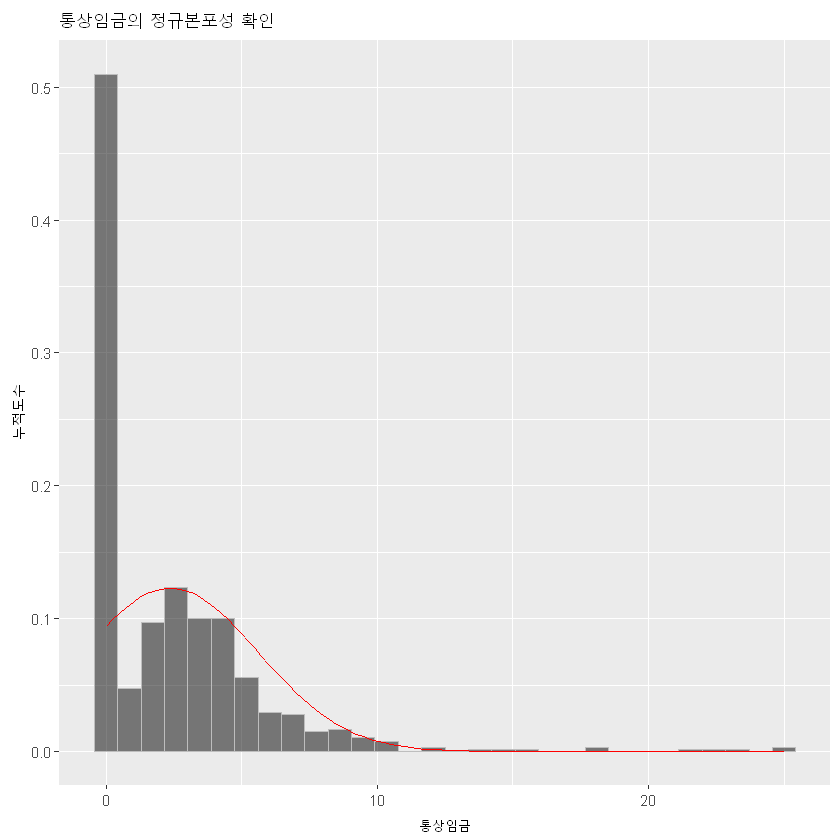

In [16]:
fig1<-ggplot(PSID1976,aes(x=wage))+
    geom_histogram(aes(y=..density..),alpha=0.5,fill='black',col='grey')+
    stat_function(fun=dnorm,color='red',args=list(mean=mean(wage,na.rm=TRUE),sd=sd(wage,na.rm=TRUE)))+
    labs(title="통상임금의 정규본포성 확인",x='통상임금',y='누적도수')
suppressWarnings(suppressMessages(print(fig1)))

이제 log임금 그래프를 그려보자.

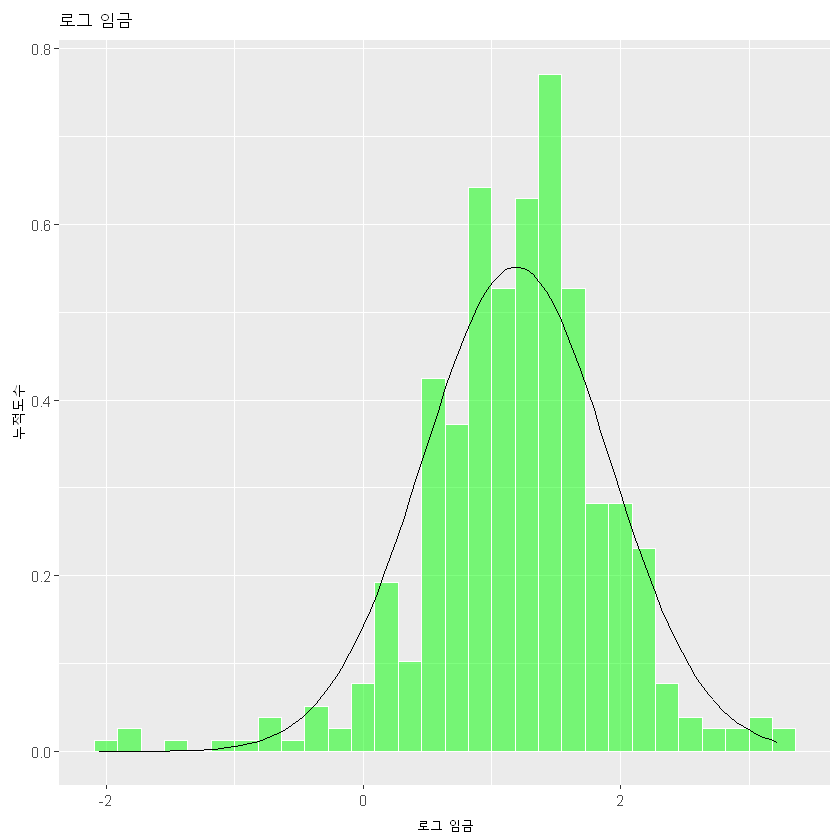

In [17]:
fig2<-ggplot(PSID1976,aes(x=logwage))+
    geom_histogram(aes(y=..density..),alpha=0.5,fill='green',col='white',na.rm=TRUE)+
    stat_function(fun=dnorm,args=list(mean=mean(PSID1976$logwage,na.rm=TRUE),sd=sd(PSID1976$logwage,na.rm=TRUE)))+
    labs(title="로그 임금",x="로그 임금",y="누적도수")
suppressWarnings(suppressMessages(print(fig2)))

두 그래프를 함께 두고 비교해보자.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


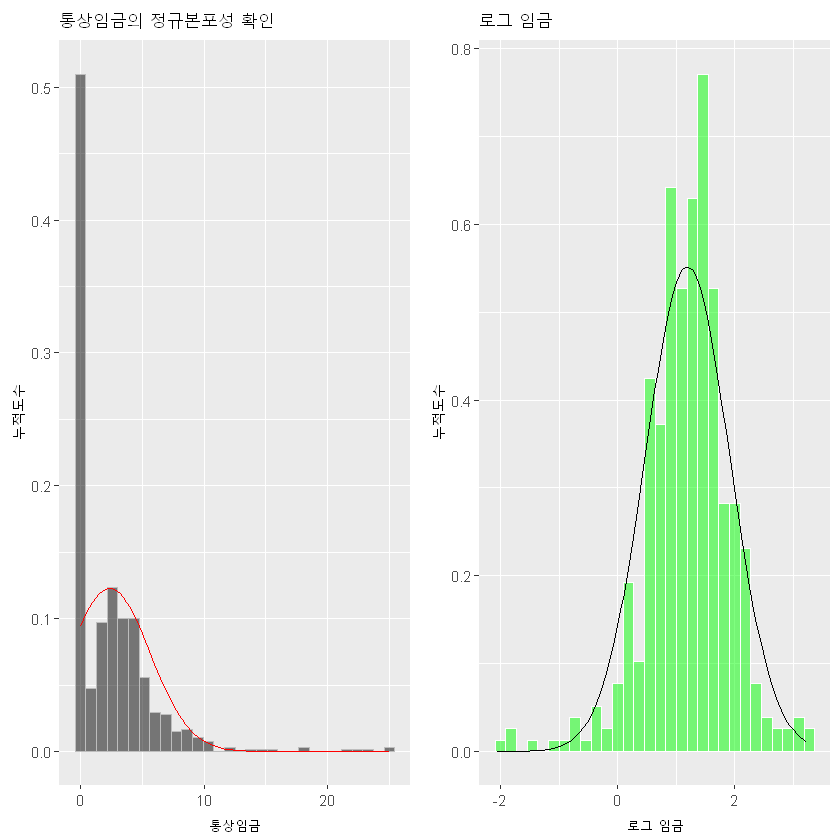

In [18]:
grid.arrange(fig1,fig2,ncol=2)

확연히 통상임금이 정규분포에서 벗어난다. 일단 긴 꼬리 부분에 히스토그램 막대가 높이 올라간 것부터가 이상하다. 반면 로그 임금을 취하니 정규분포와 꽤나 가까워진다. 왜 y변수에 로그임금을 써야 하는가에 대한 충분한 이유가 된다.

정규분포(normal distribution)는 말그대로 세상에 존재하는 어떤 것이든지 통상(normal) 따라야 할 확률의 모습이다. 중심(평균)에서 많이 관측되고 평균에서 멀어질수록 관측될 확률값은 낮아지며 평균을 중심으로 좌우대칭인 형태다. 아무런 가정이 없을 때 우리는 통상 어떤 일이든 정규분포에 따라 확률이 정해질 것으로 기대할 수 있다. 전통적인 통계의 함수들은 모두 정규분포를 어느정도 고려하고 있다. 이 정규분포를 바탕으로 보다 현실적인 확률밀도함수를 사용할 수 있는데 가령 t-분포함수나 F-분포함수, 카이제곱-분포함수가 그런 것들이다. 우리는 OLS회귀에서 바로 F-분포함수를 사용한다.

### Ordinary Least Square 회귀
최소자승 회귀분석(OLS Regression Analysis)를 수행하자. 모델링을 하는 함수 lm()은 linear model 선형모델이라는 뜻이다. 모델의 계산식은 y변수~x변수들 형태로 사용한다. 우리는 y변수에 logwage와 x변수에 education+experience를 두고 데이터는 PSID1976을 투입한다. 모델의 결과를 보려면 summary()함수를 사용한다.

In [19]:
summary(lm(logwage~education+experience,data=PSID1976))


Call:
lm(formula = logwage ~ education + experience, data = PSID1976)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.05608 -0.30524  0.05599  0.38846  2.27384 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.400174   0.190368  -2.102 0.036132 *  
education    0.109489   0.014167   7.728 7.94e-14 ***
experience   0.015674   0.004019   3.900 0.000112 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.669 on 425 degrees of freedom
  (325 observations deleted due to missingness)
Multiple R-squared:  0.1484,	Adjusted R-squared:  0.1444 
F-statistic: 37.02 on 2 and 425 DF,  p-value: 1.512e-15


R의 분석리포트는 자세하고 친절하다. Call은 모델을 다시 보여주고, Residuals은 모델이 설명하지 못한 부분(엡실론)의 분포를 간단히 보여준다. 그리고 추정값인 coefficients를 자세히 설명하고 있다. Estimate는 방정식에 사용될 구체적인 값들이다. Std. Error는 추정치가 얼마나 틀릴 수 있나를 보여주는 것으로 값이 클수록 실제 현실값과 추정한 estimate 사이에 괴리가 커진다. 또한 t-value는 estimate를 통계적으로 의미 있는 숫자로 볼 것인가를 결정하는 확률값을 계산한다. t-value가 클수록 통계적으로 더 의미가 있는 추정치라는 뜻이고 Pr(>|t|)는 실제로 "의미가 없을 것"이라는 반론이 맞을 확률이다. p-value가 작을수록 반론이 끼어들 여지가 없다. 7.94e-14의 경우 소수점 14자리에서 7.94를 곱하라는 뜻으로 아주 0에 가깝다. 별표는 1개보다는 2개가 더 통계적으로 의미가 있다는 간편 표현법이다. 통상 1개부터 우리는 의미 있는 숫자라고 본다. 이외에 모델의 분산설명력을 나타내는 Adjusted R-squared가 있다. 14.44%의 데이터를 모형으로 정확히 설명하고 있다는 뜻이다. 큰 의미는 없다. 투입되는 설명 변수가 많아지면 Adj. R-squared는 체계적으로 커진다. 다만 2개의 변수만으로도 15%가까운 설명력을 보인다는 것이 중요하다.

모형을 좀더 수정하자. 

일을 하는 연차가 늘어나면 실제로 임금이 떨어질 수 있다. 성과를 내기가 더 힘들고 육체적 능력도 저하될 수 있다. 따라서 experience는 2차형이 되면 어떨까? 2차 형을 만들기 위해 I()함수를 써서 새로 변수를 임시로 정의하자. 이 함수는 제약(inhibit)이라는 의미로 원래 있던 변수를 잠시 계산해서 사용하는(그래서 제약이 걸린) 변수를 만들어준다. 여기서는 제곱(^2)이 되는 2차 함수를 정의했다. 즉,

$$ log_{wage}=\beta_{0}+\beta_{1}experience{i}+\beta_{2}experience_{i}^{2}+\beta_{3}education_{i}+\epsilon_{i}$$

모형을 알아본다.

In [20]:
my_model<-lm(logwage~education+experience+I(experience^2),data=PSID1976)
summary(my_model)


Call:
lm(formula = logwage ~ education + experience + I(experience^2), 
    data = PSID1976)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.08404 -0.30627  0.04952  0.37498  2.37115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.5220406  0.1986321  -2.628  0.00890 ** 
education        0.1074896  0.0141465   7.598 1.94e-13 ***
experience       0.0415665  0.0131752   3.155  0.00172 ** 
I(experience^2) -0.0008112  0.0003932  -2.063  0.03974 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6664 on 424 degrees of freedom
  (325 observations deleted due to missingness)
Multiple R-squared:  0.1568,	Adjusted R-squared:  0.1509 
F-statistic: 26.29 on 3 and 424 DF,  p-value: 1.302e-15


In [21]:
summary(PSID1976$experience)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.00    9.00   10.63   15.00   45.00 

### OLS 결과에 대한 시각적 설명
OLS결과를 바탕으로 교육과 경력에 따른 시뮬레이션을 수행하자. 이를 시각적으로 보여주면 설명하기 좋다. 우선 우리가 모형에서 확인한 것은 교육과 경력에 따라 다음과 같은 관계가 있다는 사실이다.

1. 교육을 오래하면 임금이 오른다.
1. 경력을 오래 쌓으면 임금이 오르지만 어느 정도까지만 그렇고 시간이 지나면 오히려 임금이 감소한다.

이를 그래프로 그려서 확인하자.

아래 코드는 100% 이해를 하지 못해도 좋다. 다만 앞서 설명한 것을 바탕으로 최대한 생각해보자.

In [22]:
options(repr.plot.width=7) #plot representation size를 조절하자. RStudio에서는 불필요하다.
options(repr.plot.height=2.5)

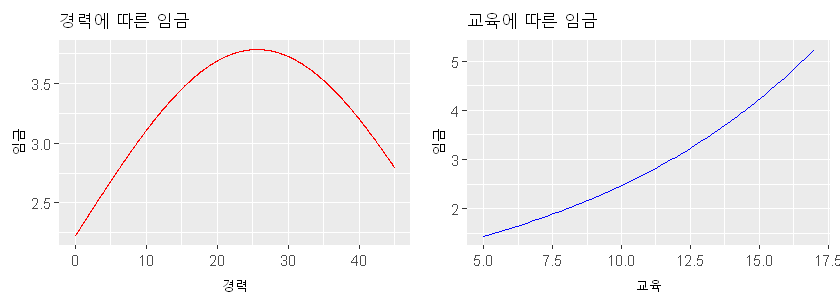

In [23]:
exp_x<-seq(min(PSID1976$experience),max(PSID1976$experience),length.out=1000)
edu_x<-mean(PSID1976$education)
prediction_data<-data.frame(experience=exp_x,education=edu_x)
predicted_y<-exp(predict(my_model,newdata=prediction_data))
predicted_data_experience<-data.frame(x=exp_x,y=predicted_y)
fig3<-ggplot(predicted_data_experience,aes(x=x,y=y))+
    geom_line(color='red')+
    labs(x='경력',y='임금',title='경력에 따른 임금')
#다음으로 교육에 따른 임금효과를 보자. log를 취한 것을 exp로 다시 풀었다.
edu_x<-seq(min(PSID1976$education),max(PSID1976$education),length.out=100)
exp_x<-mean(PSID1976$experience)
prediction_data<-data.frame(experience=exp_x,education=edu_x)
predicted_y<-exp(predict(my_model,newdata=prediction_data))
predicted_data_education<-data.frame(x=edu_x,y=predicted_y)
fig4<-ggplot(predicted_data_education,aes(x=x,y=y))+
    geom_line(color='blue')+
    labs(x='교육',y='임금',title='교육에 따른 임금')
grid.arrange(fig3,fig4,ncol=2)